# Project Data Analysis with Python : E-Commerce Public Dataset

- Name: Nathanael Steven Soetrisno

## Question Analysis
1. Which payment method is the most frequently used by customers?
2. Which product categories generate the highest and lowest revenue?
3. What are the top-selling products in each geographical region?
4. What is the average delivery time for orders, and how does it vary across different regions?
5. How much total revenue in each months that based on order_approved_at?
6. What is the location of the area with the most customers?

# Setup

In [61]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request

# Data Wragling

## Gathering Data

In [63]:
df_customers = pd.read_csv('data/customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [64]:
df_geolocation = pd.read_csv('data/geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [65]:
df_order_items = pd.read_csv('data/order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [66]:
df_order_payments = pd.read_csv('data/order_payments_dataset.csv')
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [67]:
df_order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [68]:
df_orders = pd.read_csv('data/orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [69]:
df_product_category = pd.read_csv('data/product_category_name_translation.csv')
df_product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [70]:
df_products = pd.read_csv('data/products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [71]:
df_sellers = pd.read_csv('data/sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Assessing Data

### Missing Value Check

In [72]:
print("Total missing value in customers dataset :", df_customers.isnull().sum(), '\n')
print("Total missing value in geolocation dataset :", df_geolocation.isnull().sum(), '\n')
print("Total missing value in order items dataset :", df_order_items.isnull().sum(), '\n')
print("Total missing value in order payments dataset :", df_order_payments.isnull().sum(), '\n')
print("Total missing value in order reviews dataset :", df_order_reviews.isnull().sum(), '\n')
print("Total missing value in orders dataset :", df_orders.isnull().sum(), '\n')
print("Total missing value in prduct category name dataset :", df_product_category.isnull().sum(), '\n')
print("Total missing value in products dataset :", df_products.isnull().sum(), '\n')
print("Total missing value in sellers dataset :", df_sellers.isnull().sum(), '\n')

Total missing value in customers dataset : customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Total missing value in geolocation dataset : geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

Total missing value in order items dataset : order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Total missing value in order payments dataset : order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

Total missing value in order reviews dataset : review_id                      0
order_id                       0
review_score              

Summary - Missing value check 
| Dataset                     | Columns with Missing Values                                       | Number of Missing Values                |
|-----------------------------|-------------------------------------------------------------------|-----------------------------------------|
| Customer Dataset             | None                                                             | 0                                       |
| Order Dataset                | order_approved_at, order_delivered_carrier_date, order_delivered_customer_date | 160, 1783, 2965                        |
| Product Dataset              | product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm | 610, 610, 610, 610, 2, 2, 2, 2          |
| Seller Dataset               | None                                                             | 0                                       |
| Product Category Dataset     | None                                                             | 0                                       |
| Review Dataset               | review_comment_title, review_comment_message                     | 87656, 58247                            |
| Order Payments Dataset       | None                                                             | 0                                       |
| Order Items Dataset          | None                                                             | 0                                       |
| Geolocation Dataset          | None                                                             | 0                                       |

### Duplicated Data Check

In [73]:
print("Total duplicated data in customers dataset :", df_customers.duplicated().sum())
print("Total duplicated data in geolocation dataset :", df_geolocation.duplicated().sum())
print("Total duplicated data in order items dataset :", df_order_items.duplicated().sum())
print("Total duplicated data in order payments dataset :", df_order_payments.duplicated().sum())
print("Total duplicated data in order reviews dataset :", df_order_reviews.duplicated().sum())
print("Total duplicated data in orders dataset :", df_orders.duplicated().sum())
print("Total duplicated data in prduct category name dataset :", df_product_category.duplicated().sum())
print("Total duplicated data in products dataset :", df_products.duplicated().sum())
print("Total duplicated data in sellers dataset :", df_sellers.duplicated().sum())

Total duplicated data in customers dataset : 0
Total duplicated data in geolocation dataset : 261831
Total duplicated data in order items dataset : 0
Total duplicated data in order payments dataset : 0
Total duplicated data in order reviews dataset : 0
Total duplicated data in orders dataset : 0
Total duplicated data in prduct category name dataset : 0
Total duplicated data in products dataset : 0
Total duplicated data in sellers dataset : 0


Summary - Duplicate Data Check

| Dataset                          | Number of Duplicated Records |
|-----------------------------------|------------------------------|
| Customers Dataset                 | 0                            |
| Geolocation Dataset               | 261,831                      |
| Order Items Dataset               | 0                            |
| Order Payments Dataset            | 0                            |
| Order Reviews Dataset             | 0                            |
| Orders Dataset                    | 0                            |
| Product Category Name Dataset     | 0                            |
| Products Dataset                  | 0                            |
| Sellers Dataset                   | 0                            |

### Outlier Check

Some datasets do not have a numeric column that is relevant for outliers
1. Customer dataset
2. Order reviews dataset
3. Sellers dataset

In [74]:
def outliers(data):
    q25, q75 = np.percentile(data,25), np.percentile(data,75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    outliers = [x for x in data if x < minimum or x > maximum]
    return outliers

# Geolocation dataset - outliers pada latitude dan longitude
geolocation_lat_outliers = outliers(df_geolocation['geolocation_lat'])
geolocation_lng_outliers = outliers(df_geolocation['geolocation_lng'])
print(f"Total outliers in geolocation latitude: {len(geolocation_lat_outliers)}")
print(f"Total outliers in geolocation longitude: {len(geolocation_lng_outliers)}")

# Order items dataset - outliers pada price dan freight value
price_outliers = outliers(df_order_items['price'])
freight_value_outliers = outliers(df_order_items['freight_value'])
print(f"Total outliers in order item price: {len(price_outliers)}")
print(f"Total outliers in freight value: {len(freight_value_outliers)}")

# Order payments dataset - outliers pada payment_value
payment_value_outliers = outliers(df_order_payments['payment_value'])
print(f"Total outliers in payment value: {len(payment_value_outliers)}")

# Orders dataset - outliers pada delivery and estimated delivery times (days difference)
df_orders['delivery_time'] = (pd.to_datetime(df_orders['order_delivered_customer_date']) - pd.to_datetime(df_orders['order_purchase_timestamp'])).dt.days
delivery_time_outliers = outliers(df_orders['delivery_time'].dropna())
print(f"Total outliers in delivery time: {len(delivery_time_outliers)}")

# Products dataset - outliers pada weight, length, height, dan width
product_weight_outliers = outliers(df_products['product_weight_g'])
product_length_outliers = outliers(df_products['product_length_cm'])
product_height_outliers = outliers(df_products['product_height_cm'])
product_width_outliers = outliers(df_products['product_width_cm'])

print(f"Total outliers in product weight: {len(product_weight_outliers)}")
print(f"Total outliers in product length: {len(product_length_outliers)}")
print(f"Total outliers in product height: {len(product_height_outliers)}")
print(f"Total outliers in product width: {len(product_width_outliers)}")

Total outliers in geolocation latitude: 168240
Total outliers in geolocation longitude: 42348
Total outliers in order item price: 8427
Total outliers in freight value: 12134
Total outliers in payment value: 7981
Total outliers in delivery time: 5025
Total outliers in product weight: 0
Total outliers in product length: 0
Total outliers in product height: 0
Total outliers in product width: 0


Summary - Outlier Check

| Feature                     | Number of Outliers |
|-----------------------------|--------------------|
| Geolocation Latitude         | 168,240            |
| Geolocation Longitude        | 42,348             |
| Order Item Price             | 8,427              |
| Freight Value                | 12,134             |
| Payment Value                | 7,981              |
| Delivery Time                | 5,025              |
| Product Weight               | 0                  |
| Product Length               | 0                  |
| Product Height               | 0                  |
| Product Width                | 0                  |

### Cleaning Data

1. Orders dataset

   in the orders dataset, null values ​​in the three previously defined variables depend on the order status category

In [75]:
df_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [76]:
null_in_order_approved_at = df_orders.groupby('order_status')['order_approved_at'].apply(lambda x: x.isnull().sum())
null_in_order_delivered_carrier_date = df_orders.groupby('order_status')['order_delivered_carrier_date'].apply(lambda x: x.isnull().sum())
null_in_order_delivered_customer_date = df_orders.groupby('order_status')['order_delivered_customer_date'].apply(lambda x: x.isnull().sum())

print(null_in_order_approved_at, '\n')
print(null_in_order_delivered_carrier_date, '\n')
print(null_in_order_delivered_customer_date, '\n')

order_status
approved         0
canceled       141
created          5
delivered       14
invoiced         0
processing       0
shipped          0
unavailable      0
Name: order_approved_at, dtype: int64 

order_status
approved         2
canceled       550
created          5
delivered        2
invoiced       314
processing     301
shipped          0
unavailable    609
Name: order_delivered_carrier_date, dtype: int64 

order_status
approved          2
canceled        619
created           5
delivered         8
invoiced        314
processing      301
shipped        1107
unavailable     609
Name: order_delivered_customer_date, dtype: int64 



Cleaning dataset methods for orders_dataset
1. if status == delivered, then null in order_aproved_at = order_purchase_timestamp 
2. if status == delivered, then null in order_delivered_customer_date = order_estimated_delivery_date
3. if status == delivered, then null in order_delivered_carrier_date = average(delivery_time)


In [77]:
# methods 1 - if status == delivered, then null in order_aproved_at = order_purchase_timestamp 

df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])

print("Null counts (before) :", df_orders.loc[(df_orders['order_status'] == 'delivered') & (df_orders['order_approved_at'].isnull())].shape[0])

df_orders.loc[(df_orders['order_status'] == 'delivered') & (df_orders['order_approved_at'].isnull()), 'order_approved_at'] = df_orders['order_purchase_timestamp']

print("Null counts (after) :", df_orders.loc[(df_orders['order_status'] == 'delivered') & (df_orders['order_approved_at'].isnull())].shape[0])


Null counts (before) : 14
Null counts (after) : 0


In [78]:
# if status == delivered, then null in order_delivered_customer_date = order_estimated_delivery_date

print("Null counts (before) :", df_orders.loc[(df_orders['order_status'] == 'delivered') & df_orders['order_delivered_customer_date'].isnull()].shape[0])

df_orders['order_delivered_customer_date'].fillna(df_orders['order_estimated_delivery_date'], inplace=True)

print("Null counts (after) :", df_orders.loc[(df_orders['order_status'] == 'delivered') & df_orders['order_delivered_customer_date'].isnull()].shape[0])



Null counts (before) : 8
Null counts (after) : 0


C:\Users\natha\AppData\Local\Temp\ipykernel_25844\669671058.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_orders['order_delivered_customer_date'].fillna(df_orders['order_estimated_delivery_date'], inplace=True)


In [79]:
# null value in delivery time, can be filled with average delivery time

print("Null counts (before) :", df_orders.loc[(df_orders['order_status'] == 'delivered') & df_orders['delivery_time'].isnull()].shape[0])

average_delivery_time = df_orders['delivery_time'].mean()
df_orders['delivery_time'].fillna(average_delivery_time, inplace=True)

print("Null counts (after) :", df_orders.loc[(df_orders['order_status'] == 'delivered') & df_orders['delivery_time'].isnull()].shape[0])



Null counts (before) : 8
Null counts (after) : 0


C:\Users\natha\AppData\Local\Temp\ipykernel_25844\420146523.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_orders['delivery_time'].fillna(average_delivery_time, inplace=True)


In [80]:
# methods 3 - if status == delivered, then null in order_delivered_carrier_date = average(delivery_time)

df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])

print("Null counts (before) :", df_orders.loc[(df_orders['order_status'] == 'delivered') & df_orders['order_delivered_carrier_date'].isnull()].shape[0])

average_delivery_time = df_orders['delivery_time'].mean()

print(f"Average delivery time {average_delivery_time}")

df_orders.loc[(df_orders['order_status'] == 'delivered') & (df_orders['order_delivered_carrier_date'].isnull()), 'order_delivered_carrier_date'] = df_orders['order_delivered_customer_date'] - pd.to_timedelta(average_delivery_time, unit='d')

print("Null counts (after) :", df_orders.loc[(df_orders['order_status'] == 'delivered') & df_orders['order_delivered_carrier_date'].isnull()].shape[0])



Null counts (before) : 2
Average delivery time 12.094085575687215
Null counts (after) : 0


2. Products dataset

In [81]:
df_products['product_category_name'].fillna('Unknown', inplace=True)
df_products['product_name_lenght'].fillna(df_products['product_name_lenght'].mean(), inplace=True)
df_products['product_description_lenght'].fillna(df_products['product_description_lenght'].mean(), inplace=True)
df_products['product_photos_qty'].fillna(df_products['product_photos_qty'].mean(), inplace=True)
df_products['product_weight_g'].fillna(df_products['product_weight_g'].mean(), inplace=True)
df_products['product_length_cm'].fillna(df_products['product_length_cm'].mean(), inplace=True)
df_products['product_height_cm'].fillna(df_products['product_height_cm'].mean(), inplace=True)
df_products['product_width_cm'].fillna(df_products['product_width_cm'].mean(), inplace=True)

C:\Users\natha\AppData\Local\Temp\ipykernel_25844\1682733781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products['product_category_name'].fillna('Unknown', inplace=True)
C:\Users\natha\AppData\Local\Temp\ipykernel_25844\1682733781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [82]:
df_products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

3. Review Dataset

In [83]:
df_order_reviews.fillna('No Comment', inplace=True)

In [84]:
df_order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

### Explanatory Data Analysis

1. Customer dataset

In [88]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [95]:
# total customer in every city
df_customers.groupby('customer_city')['customer_id'].count()

customer_city
abadia dos dourados     3
abadiania               1
abaete                 12
abaetetuba             11
abaiara                 2
                       ..
xinguara                9
xique-xique             3
zacarias                2
ze doca                 5
zortea                  2
Name: customer_id, Length: 4119, dtype: int64

In [96]:
# total customer in every state
df_customers.groupby('customer_state')['customer_id'].count()

customer_state
AC       81
AL      413
AM      148
AP       68
BA     3380
CE     1336
DF     2140
ES     2033
GO     2020
MA      747
MG    11635
MS      715
MT      907
PA      975
PB      536
PE     1652
PI      495
PR     5045
RJ    12852
RN      485
RO      253
RR       46
RS     5466
SC     3637
SE      350
SP    41746
TO      280
Name: customer_id, dtype: int64

2. Geolocation dataset

In [99]:
# count total zipcode and mean for longitude and latitude in every state

df_geolocation.groupby(df_geolocation['geolocation_state']).agg({
    'geolocation_zip_code_prefix': 'nunique',
    'geolocation_lng' : 'mean',
    'geolocation_lat' : 'mean'
})

,geolocation_zip_code_prefix,geolocation_lng,geolocation_lat
geolocation_state,,,
AC,46,-68.451852,-9.702555
AL,178,-36.052017,-9.599729
AM,144,-60.537430,-3.349336
AP,26,-51.234304,0.086025
BA,992,-39.560649,-13.049361
CE,548,-39.004140,-4.363151
DF,516,-47.969630,-15.810885
ES,315,-40.503183,-20.105145
GO,773,-49.334195,-16.577645


3. Order items dataset combined with Products dataset and Seller dataset

In [192]:
# Show total item sold, revenue, and average freight_value for each products

df_product_agg = df_order_items.groupby('product_id').agg({
    'order_item_id': 'count',          
    'price': 'sum',                    
    'freight_value': 'mean'            
}).rename(columns={
    'order_item_id': 'total_items_sold',
    'price': 'total_revenue',
    'freight_value': 'avg_freight_value'
})

df_final_product_agg = pd.merge(df_product_agg, df_products[['product_id', 'product_category_name']], on='product_id')

df_final_product_agg = pd.merge(df_final_product_agg, df_product_category[['product_category_name']], on='product_category_name', how='left')

df_final_product_agg[['product_category_name', 'total_items_sold', 'total_revenue', 'avg_freight_value']]

,product_category_name,total_items_sold,total_revenue,avg_freight_value
0,perfumaria,1,101.65,18.590
1,automotivo,1,129.90,13.930
2,cama_mesa_banho,1,229.00,13.100
3,utilidades_domesticas,2,117.80,19.600
4,relogios_presentes,1,199.00,19.270
...,...,...,...,...
32946,cool_stuff,2,229.98,27.705
32947,beleza_saude,1,90.00,7.890
32948,fashion_bolsas_e_acessorios,1,32.00,11.850
32949,informatica_acessorios,5,169.95,11.774


In [149]:
# Show total seller for every seller_state

df_sellers.groupby(df_sellers['seller_state']).agg({
    'seller_id' : 'count'
})

,seller_id
seller_state,
AC,1
AM,1
BA,19
CE,13
DF,30
ES,23
GO,40
MA,1
MG,244


In [150]:
# Show total product sold, and total revenue for each seller 

df_order_items.groupby(df_order_items['seller_id']).agg({
    'product_id' : 'count',
    'price' : 'sum'
}).rename(columns={
    'product_id' : 'total product sold',
    'price' : 'total revenue'
})

,total product sold,total revenue
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,3,2685.00
001cca7ae9ae17fb1caed9dfb1094831,239,25080.03
001e6ad469a905060d959994f1b41e4f,1,250.00
002100f778ceb8431b7a1020ff7ab48f,55,1234.50
003554e2dce176b5555353e4f3555ac8,1,120.00
...,...,...
ffcfefa19b08742c5d315f2791395ee5,1,69.90
ffdd9f82b9a447f6f8d4b91554cc7dd3,20,2101.20
ffeee66ac5d5a62fe688b9d26f83f534,14,1839.86


In [153]:
# Show total item sold for each seller_state

df_seller_merged = pd.merge(df_order_items, df_sellers[['seller_id', 'seller_state']], on='seller_id', how='left')
df_total_item_sold_per_state = df_seller_merged.groupby('seller_state')['order_item_id'].count().reset_index()
df_total_item_sold_per_state.columns = ['seller_state', 'total_items_sold']
df_total_item_sold_per_state

,seller_state,total_items_sold
0,AC,1
1,AM,3
2,BA,643
3,CE,94
4,DF,899
5,ES,372
6,GO,520
7,MA,405
8,MG,8827
9,MS,50


3. Orders payments dataset

In [119]:
# Show most payment type used

payment_type_counts = df_order_payments['payment_type'].value_counts()
most_common_payment_type = payment_type_counts.idxmax()

print(f"Most payment type used : {most_common_payment_type}")

Most payment type used : credit_card


In [121]:
# Show total transaction, average installments for each payment type

df_order_payments.groupby(df_order_payments['payment_type']).agg({
    'payment_value' : 'sum',
    'payment_installments' : 'mean'
}).rename(columns={
    'payment_value' : 'total transaction',
    'payment_installments' : 'average installments'
})

,total transaction,average installments
payment_type,,
boleto,2869361.27,1.000000
credit_card,12542084.19,3.507155
debit_card,217989.79,1.000000
not_defined,0.00,1.000000
voucher,379436.87,1.000000


5. Order reviews & Products dataset

In [154]:
# Show average review score for each product

df_merged = pd.merge(df_order_items, df_order_reviews, on='order_id')

average_review_score_per_product = df_merged.groupby('product_id')['review_score'].mean().reset_index()
average_review_score_per_product.columns = ['product_id', 'average_review_score']

df_final = pd.merge(average_review_score_per_product, df_products[['product_id', 'product_category_name']], on='product_id')

df_final[['product_category_name', 'average_review_score']]


,product_category_name,average_review_score
0,perfumaria,5.0
1,automotivo,4.0
2,cama_mesa_banho,1.0
3,utilidades_domesticas,5.0
4,relogios_presentes,5.0
...,...,...
32784,cool_stuff,4.5
32785,beleza_saude,4.0
32786,fashion_bolsas_e_acessorios,5.0
32787,informatica_acessorios,5.0


In [127]:
# Show average review score overall

print(f"Average review score overall : {df_order_reviews['review_score'].mean()}")

Average review score overall : 4.08642062404257


6. Orders dataset

In [131]:
# Show total order for every order status
df_orders.groupby(df_orders['order_status']).agg({
    'order_id' : 'count'
}).rename(columns={
    'order_id' : 'total orders'
})

,total orders
order_status,
approved,2
canceled,625
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


In [135]:
# Show Average purchase time, Average approved time, Average delivered to carrier duration after approval,Average delivered to customer duration, Accuration between delivered to customer and order estimated delivery date

df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

average_purchase_time = df_orders['order_purchase_timestamp'].mean()

df_orders['approval_time'] = (df_orders['order_approved_at'] - df_orders['order_purchase_timestamp']).dt.total_seconds() / 3600  
average_approved_time = df_orders['approval_time'].mean()

df_orders['carrier_delivery_duration'] = (df_orders['order_delivered_carrier_date'] - df_orders['order_approved_at']).dt.total_seconds() / 3600 
average_carrier_delivery_duration = df_orders['carrier_delivery_duration'].mean()

df_orders['customer_delivery_duration'] = (df_orders['order_delivered_customer_date'] - df_orders['order_delivered_carrier_date']).dt.total_seconds() / 3600  # Dalam jam
average_customer_delivery_duration = df_orders['customer_delivery_duration'].mean()

on_time_deliveries = df_orders[df_orders['order_delivered_customer_date'] <= df_orders['order_estimated_delivery_date']].shape[0]
total_deliveries = df_orders['order_delivered_customer_date'].notnull().sum()
delivery_accuracy_percentage = (on_time_deliveries / total_deliveries) * 100

print(f"Average purchase time : {average_purchase_time}")
print(f"Average approved duration after purchased : {average_approved_time} hours")
print(f"Average delivered to carrier duration after approval : {average_carrier_delivery_duration} hours")
print(f"Average delivered to customer duration : {average_customer_delivery_duration} hours")
print(f"Accuration between delivered to customer and order estimated delivery date : {delivery_accuracy_percentage} %")


Average purchase time : 2017-12-31 08:43:12.776581120
Average approved duration after purchased : 10.417625272056888 hours
Average delivered to carrier duration after approval : 67.34004301207284 hours
Average delivered to customer duration : 227.4324023141155 hours
Accuration between delivered to customer and order estimated delivery date : 92.12900111623978 %


## Data Visualizations

1. Which payment method is the most frequently used by customers?

In [176]:
df_payment_agg = df_order_payments.groupby(df_order_payments['payment_type']).agg({
    'payment_value' : 'sum',
    'order_id' : 'count'
}).rename(columns={
    'payment_value' : 'total_transaction',
    'order_id' : 'total_used'
}).reset_index()

df_payment_agg

,payment_type,total_transaction,total_used
0,boleto,2869361.27,19784
1,credit_card,12542084.19,76795
2,debit_card,217989.79,1529
3,not_defined,0.00,3
4,voucher,379436.87,5775


<BarContainer object of 5 artists>

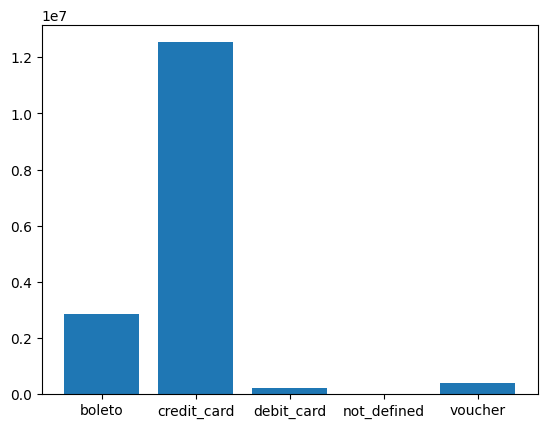

In [179]:
plt.bar(x=df_payment_agg["payment_type"], height=df_payment_agg["total_transaction"])

***The most frequently used payment method by customers is credit card with 76795 customers and USD $12542084.19 total transactions***

2. Which product categories generate the highest and lowest revenue?

In [191]:
df_final_product_agg

,product_id,total_items_sold,total_revenue,product_category_name
0,00066f42aeeb9f3007548bb9d3f33c38,1,101.65,perfumaria
1,00088930e925c41fd95ebfe695fd2655,1,129.90,automotivo
2,0009406fd7479715e4bef61dd91f2462,1,229.00,cama_mesa_banho
3,000b8f95fcb9e0096488278317764d19,2,117.80,utilidades_domesticas
4,000d9be29b5207b54e86aa1b1ac54872,1,199.00,relogios_presentes
...,...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,2,229.98,cool_stuff
32947,fff81cc3158d2725c0655ab9ba0f712c,1,90.00,beleza_saude
32948,fff9553ac224cec9d15d49f5a263411f,1,32.00,fashion_bolsas_e_acessorios
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5,169.95,informatica_acessorios


C:\Users\natha\AppData\Local\Temp\ipykernel_25844\3097848740.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


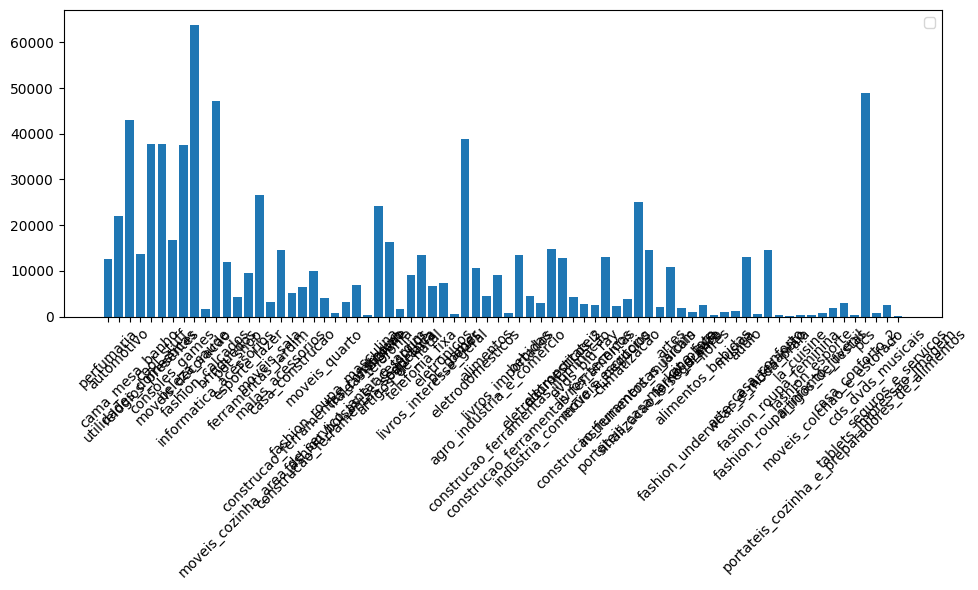

In [228]:
plt.subplots(figsize=(10, 6))
plt.bar(x=df_final_product_agg["product_category_name"], height=df_final_product_agg["total_revenue"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [205]:
df_merged = pd.merge(df_order_items, df_products[['product_id', 'product_category_name']], on='product_id')
df_revenue = df_merged.groupby('product_category_name').agg({
    'price': 'sum'
}).reset_index().rename(columns={
    'price': 'total_revenue'
})

print(f"Lowest product's revenue : \n {df_revenue.nsmallest(1, 'total_revenue')}")
print(f"Highest product's revenue : \n {df_revenue.nlargest(1, 'total_revenue')}")

Lowest product's revenue : 
    product_category_name  total_revenue
68    seguros_e_servicos         283.29
Highest product's revenue : 
    product_category_name  total_revenue
12          beleza_saude     1258681.34


***The Lowest product's revenue is seguros_e_servicos with total revenue = 283.29***
***The Highest product's revenue is beleza_saude with total revenue = 1258681.34***

3. What are the top-selling products in each geographical region?

In [207]:
df_merged_items_products = pd.merge(df_order_items, df_products[['product_id', 'product_category_name']], on='product_id')
df_merged_items_orders = pd.merge(df_merged_items_products, df_orders[['order_id', 'customer_id']], on='order_id')
df_final = pd.merge(df_merged_items_orders, df_customers[['customer_id', 'customer_state']], on='customer_id')

df_top_selling = df_final.groupby(['customer_state', 'product_category_name']).agg({
    'order_item_id': 'count'  
}).reset_index().rename(columns={
    'order_item_id': 'total_items_sold'
})

df_top_selling.loc[df_top_selling.groupby('customer_state')['total_items_sold'].idxmax()]


,customer_state,product_category_name,total_items_sold
20,AC,moveis_decoracao,12
36,AL,beleza_saude,63
78,AM,beleza_saude,20
112,AP,beleza_saude,10
140,BA,beleza_saude,350
203,CE,beleza_saude,167
258,DF,beleza_saude,246
321,ES,cama_mesa_banho,225
379,GO,cama_mesa_banho,235
438,MA,beleza_saude,89


4. What is the average delivery time for orders, and how does it vary across different regions?

In [209]:
df_orders_with_region = pd.merge(df_orders, df_customers[['customer_id', 'customer_state']], on='customer_id')
df_orders_with_region['delivery_time_days'] = (df_orders_with_region['order_delivered_customer_date'] - df_orders_with_region['order_purchase_timestamp']).dt.days

df_orders_with_region.groupby('customer_state').agg({
    'delivery_time_days': 'mean'
}).reset_index().rename(columns={
    'delivery_time_days': 'average_delivery_time'
})

,customer_state,average_delivery_time
0,AC,20.925926
1,AL,24.372881
2,AM,26.202703
3,AP,26.852941
4,BA,19.204438
5,CE,21.184880
6,DF,12.944860
7,ES,15.570093
8,GO,15.535149
9,MA,21.506024


C:\Users\natha\AppData\Local\Temp\ipykernel_25844\1865121366.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


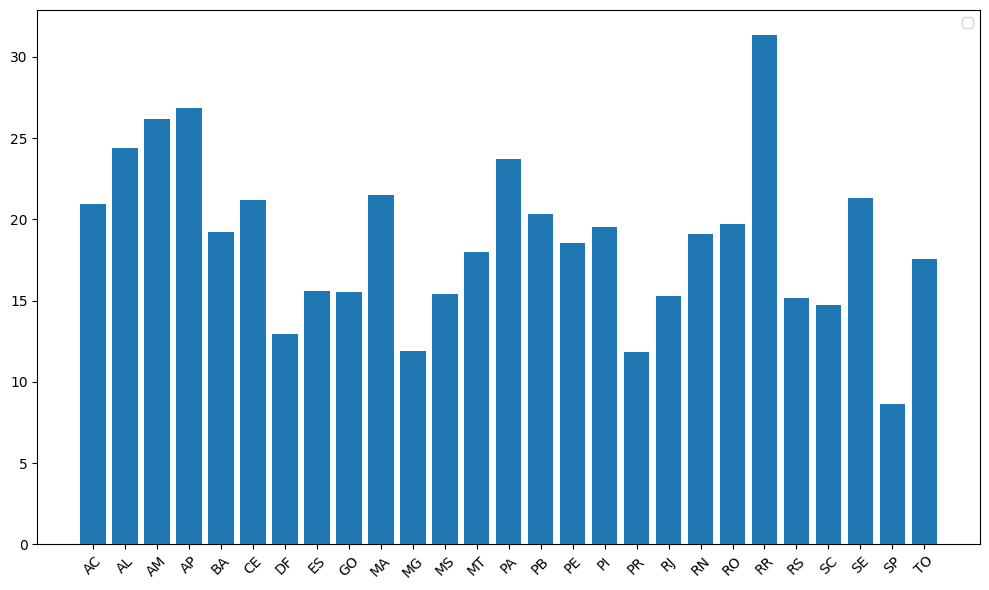

In [227]:
df_final_orders_with_region = df_orders_with_region.groupby('customer_state').agg({
    'delivery_time_days': 'mean'
}).reset_index().rename(columns={
    'delivery_time_days': 'average_delivery_time'
}).reset_index()

plt.subplots(figsize=(10, 6))
plt.bar(x=df_final_orders_with_region["customer_state"], height=df_final_orders_with_region["average_delivery_time"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. How much total revenue in each months that based on order_approved_at?

In [213]:
df_non_cancelled = df_orders[df_orders['order_status'] != 'cancelled']

df_merged = pd.merge(df_non_cancelled[['order_id', 'order_approved_at']], df_order_items[['order_id', 'price']], on='order_id')

df_merged['month_year'] = df_merged['order_approved_at'].dt.to_period('M') 

df_merged.groupby('month_year').agg({
    'price': 'sum'
}).reset_index().rename(columns={
    'price': 'total_revenue'
})


,month_year,total_revenue
0,2016-09,134.97
1,2016-10,49640.05
2,2016-12,10.90
3,2017-01,114946.60
4,2017-02,249025.62
5,2017-03,370611.56
6,2017-04,357638.73
7,2017-05,507167.89
8,2017-06,437278.58
9,2017-07,492766.06


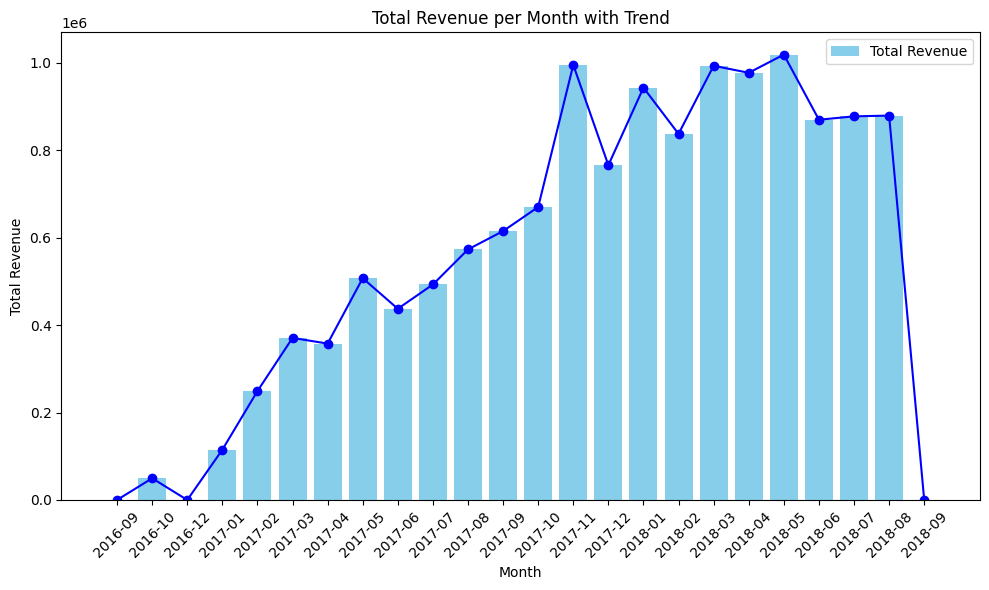

In [224]:
df_revenue_per_month = df_merged.groupby('month_year').agg({
    'price': 'sum'
}).reset_index().rename(columns={
    'price': 'total_revenue'
})

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_revenue_per_month['month_year'].astype(str), df_revenue_per_month['total_revenue'], color='skyblue', label='Total Revenue')
ax.plot(df_revenue_per_month["month_year"].astype(str), df_revenue_per_month["total_revenue"], marker='o', color='b')
ax.set_title('Total Revenue per Month with Trend')
ax.set_xlabel('Month')
ax.set_ylabel('Total Revenue')
plt.xticks(rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


6. What is the location of the area with the most customers?

Customer data geolocation (from 2016-09-15 00:00:00 to 2016-10-31 00:00:00)


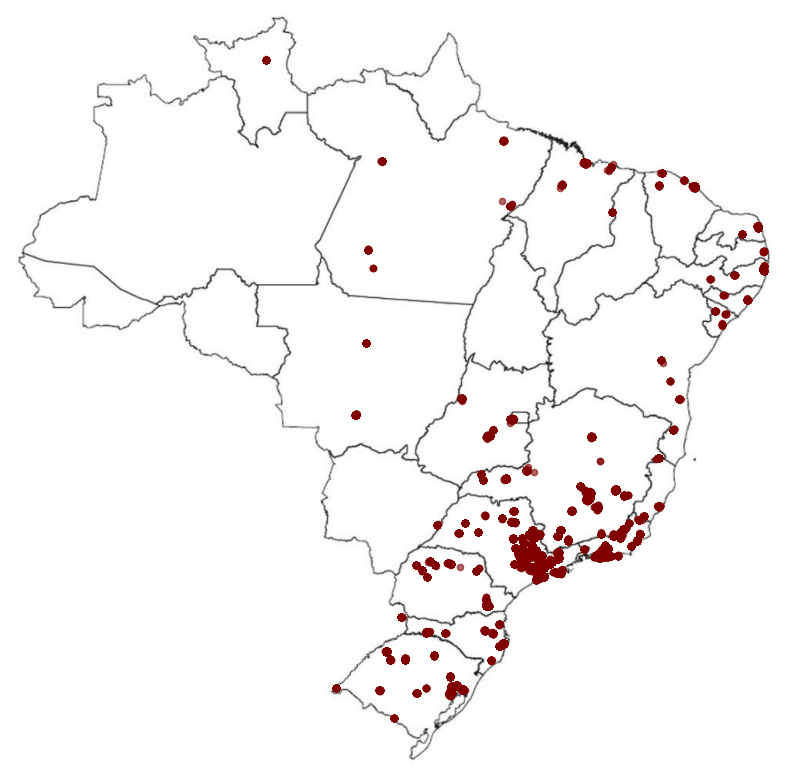

In [234]:
start_date = pd.to_datetime('2016-09-15')
end_date = pd.to_datetime('2016-10-31')

df_filtered_orders = df_orders[(df_orders['order_purchase_timestamp'] >= start_date) & 
                               (df_orders['order_purchase_timestamp'] <= end_date)]

df_orders_customers = pd.merge(df_filtered_orders[['order_id', 'customer_id']], df_customers, on='customer_id')

df_orders_geo = pd.merge(df_orders_customers, 
                         df_geolocation[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']], 
                         left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

if df_orders_geo.empty:
    print("No data available for the selected date range.")
else:
    print(f"Customer data geolocation (from {start_date} to {end_date})")

    url = 'https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'
    brazil_map = mpimg.imread(urllib.request.urlopen(url), 'jpg')

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(df_orders_geo['geolocation_lng'], df_orders_geo['geolocation_lat'], alpha=0.6, s=20, c='maroon')
    ax.axis('off')
    ax.imshow(brazil_map, extent=[-73.98283055, -33.8, -33.75116944, 5.4])
    plt.show()

### Conclussion

1. Which payment method is the most frequently used by customers?
The most frequently used payment method is credit card. This method outperforms other payment methods such as boleto, debit card, and voucher in terms of frequency of use. The convenience and widespread acceptance of credit cards likely contribute to this preference among customers.

2. Which product categories generate the highest and lowest revenue?
    - The product category that generates the lowest revenue is seguros_e_servicos, with a total revenue of 283.29. This suggests that services and insurance products are less in demand or have lower pricing compared to physical goods.
    - On the other hand, the category with the highest revenue is beleza_saude (beauty and health), generating a total revenue of 1,258,681.34. This indicates a strong consumer interest and demand for beauty and health products, which are likely contributing significantly to overall sales.

    This insight highlights the varying performance of product categories and suggests opportunities for focusing on high-revenue categories while evaluating strategies for boosting sales in lower-revenue categories.

3. What are the top-selling products in each geographical region?
    - Beleza_saude (Beauty and Health) is the most popular category in a majority of regions, including Alagoas (AL), Amazonas (AM), Bahia (BA), and Distrito Federal (DF). This category is clearly a top-seller in many states across Brazil, reflecting strong demand for beauty and health-related products nationwide.
    - Cama_mesa_banho (Bedding, Bath, and Home) is the top-selling category in larger states like São Paulo (SP) with 5,235 items sold, Rio de Janeiro (RJ) with 1,644 items sold, and Minas Gerais (MG) with 1,331 items sold. This indicates that home-related products are in high demand in these populous regions.
    - Esporte_lazer (Sports and Leisure) stands out in states like Mato Grosso do Sul (MS) and Santa Catarina (SC), reflecting regional interests in sports and leisure activities.

    This data shows regional preferences and highlights the leading product categories in different geographical areas, providing insights for localized marketing strategies and inventory planning.

4. What is the average delivery time for orders, and how does it vary across different regions?
    - The average delivery time varies significantly across different states in Brazil. The fastest average delivery times are found in São Paulo (SP) with an average of 8.64 days, Minas Gerais (MG) at 11.88 days, and Paraná (PR) at 11.83 days. These regions, typically urbanized and better connected, benefit from efficient logistics infrastructure.
    - In contrast, regions such as Roraima (RR) experience the longest delivery times, averaging 31.32 days, followed by Amapá (AP) at 26.85 days and Amazonas (AM) at 26.20 days. These states, located in more remote areas, face logistical challenges that contribute to longer delivery times.
    - Delivery times in regions like Distrito Federal (DF), the capital area, are relatively low, with an average of 12.94 days, indicating that centrally located regions with better transportation networks generally have shorter delivery times.

    This variation in delivery times highlights the challenges of logistics in remote areas and emphasizes the importance of improving supply chain efficiency in regions with longer delivery durations.

5. How much total revenue in each months that based on order_approved_at?
    - The total monthly revenue shows significant growth and fluctuation over the period, with notable peaks during November 2017 (994,849.49) and December 2017 (765,532.36), which aligns with major shopping seasons like Black Friday and holiday shopping.
    - Revenue consistently increased in 2017, with major growth from February 2017 (249,025.62) to November 2017 (994,849.49), indicating strong consumer demand throughout the year.
    - Another significant peak occurred in May 2018 with total revenue reaching 1,018,473.97, suggesting another period of high consumer activity.
    There is an unexpected drop in September 2018 to 145.00, which could be attributed to incomplete data or a temporary disruption in sales.

    Overall, the revenue trends indicate steady growth with predictable peaks during shopping seasons, though some fluctuations warrant further investigation into possible anomalies in the data.

6. What is the location of the area with the most customers?
    - Concentration of Orders in Southeast Brazil:
        The majority of orders are concentrated in the southeast region, particularly in São Paulo (SP), Minas Gerais (MG), and Rio de Janeiro (RJ), highlighting the strong e-commerce activity in these economic hubs.
    - Moderate Activity in Northeast and South:
        The northeast (e.g., Bahia, Pernambuco) and south (e.g., Paraná, Rio Grande do Sul) also show some activity, though much lower than in the southeast.
    - Low Activity in Northern and Central Regions:
        Northern and central Brazil (e.g., Amazonas, Mato Grosso) show minimal e-commerce activity, indicating limited market penetration or logistical challenges.